## Exercise 6: Search Algorithm

The search algorithm, the ultimate goal of this project.

Your algorithm should search for one or more items that meet a given requirement among N unclassified items.
- On a traditional computer, the complexity of the problem is $O(N)$.
- On a quantum computer, the complexity is reduced to $O(\sqrt{N})$

You will need to have 3 distinct parts:
- The initialization of states.
- The Oracle.
- Diffuser

Your algorithm will take a Y number of qubits (minimum 2) and must not require any modification to work.

Similar to the Deutsch-Jozsa algorithm, several Oracle’s will be provided during the evaluation to verify that your algorithm is working properly.

Here is an example of an Oracle running on 3 qubits:

![search oracle](./images/search_oracle.png)

And here is the expected answer by your algorithm for this oracle:

![search result](./images/search_result.png)

In addition to making your program containing the quantum search algorithm. During the evaluation, you will have to explain how and why your quantum algorithm is faster than a search algorithm on a classical computer.

### Solution

- Inputs:
    - N: number of items in the list
    - oracle(x): a function that returns true if x is the target item, and false otherwise.
- Step 1: Initialize state
    - Hadamard transform on all qubits
- Step 2: Iterate over Grover’s algorithm
    ``` 
    for k = 1 to sqrt(N) do
        Apply the oracle
        Apply the diffusion operator
    ```

- Diffusion Operator:
    - Hadamard transform on all qubits
    - Apply an X gate on all qubits
    - Apply a multi-controlled Z gate
        - (which flips the sign of the - state only if all qubits are in the state $|1\rangle$)
    - Apply an X gate on all qubits
    - Hadamard transform on all qubits

- Step 3: Measure the state and output the result

Formulation:
- Initial state:
$$|\psi\rangle = \frac{1}{\sqrt{N}}\sum_{x=0}^{N-1}|x\rangle$$
- Diffusion Operator:
$$U = \frac{1}{2} \left( I -|\psi\rangle\langle\psi|\right)$$

![Grover's Algorithm](./images/grover_s_algorithm.png)

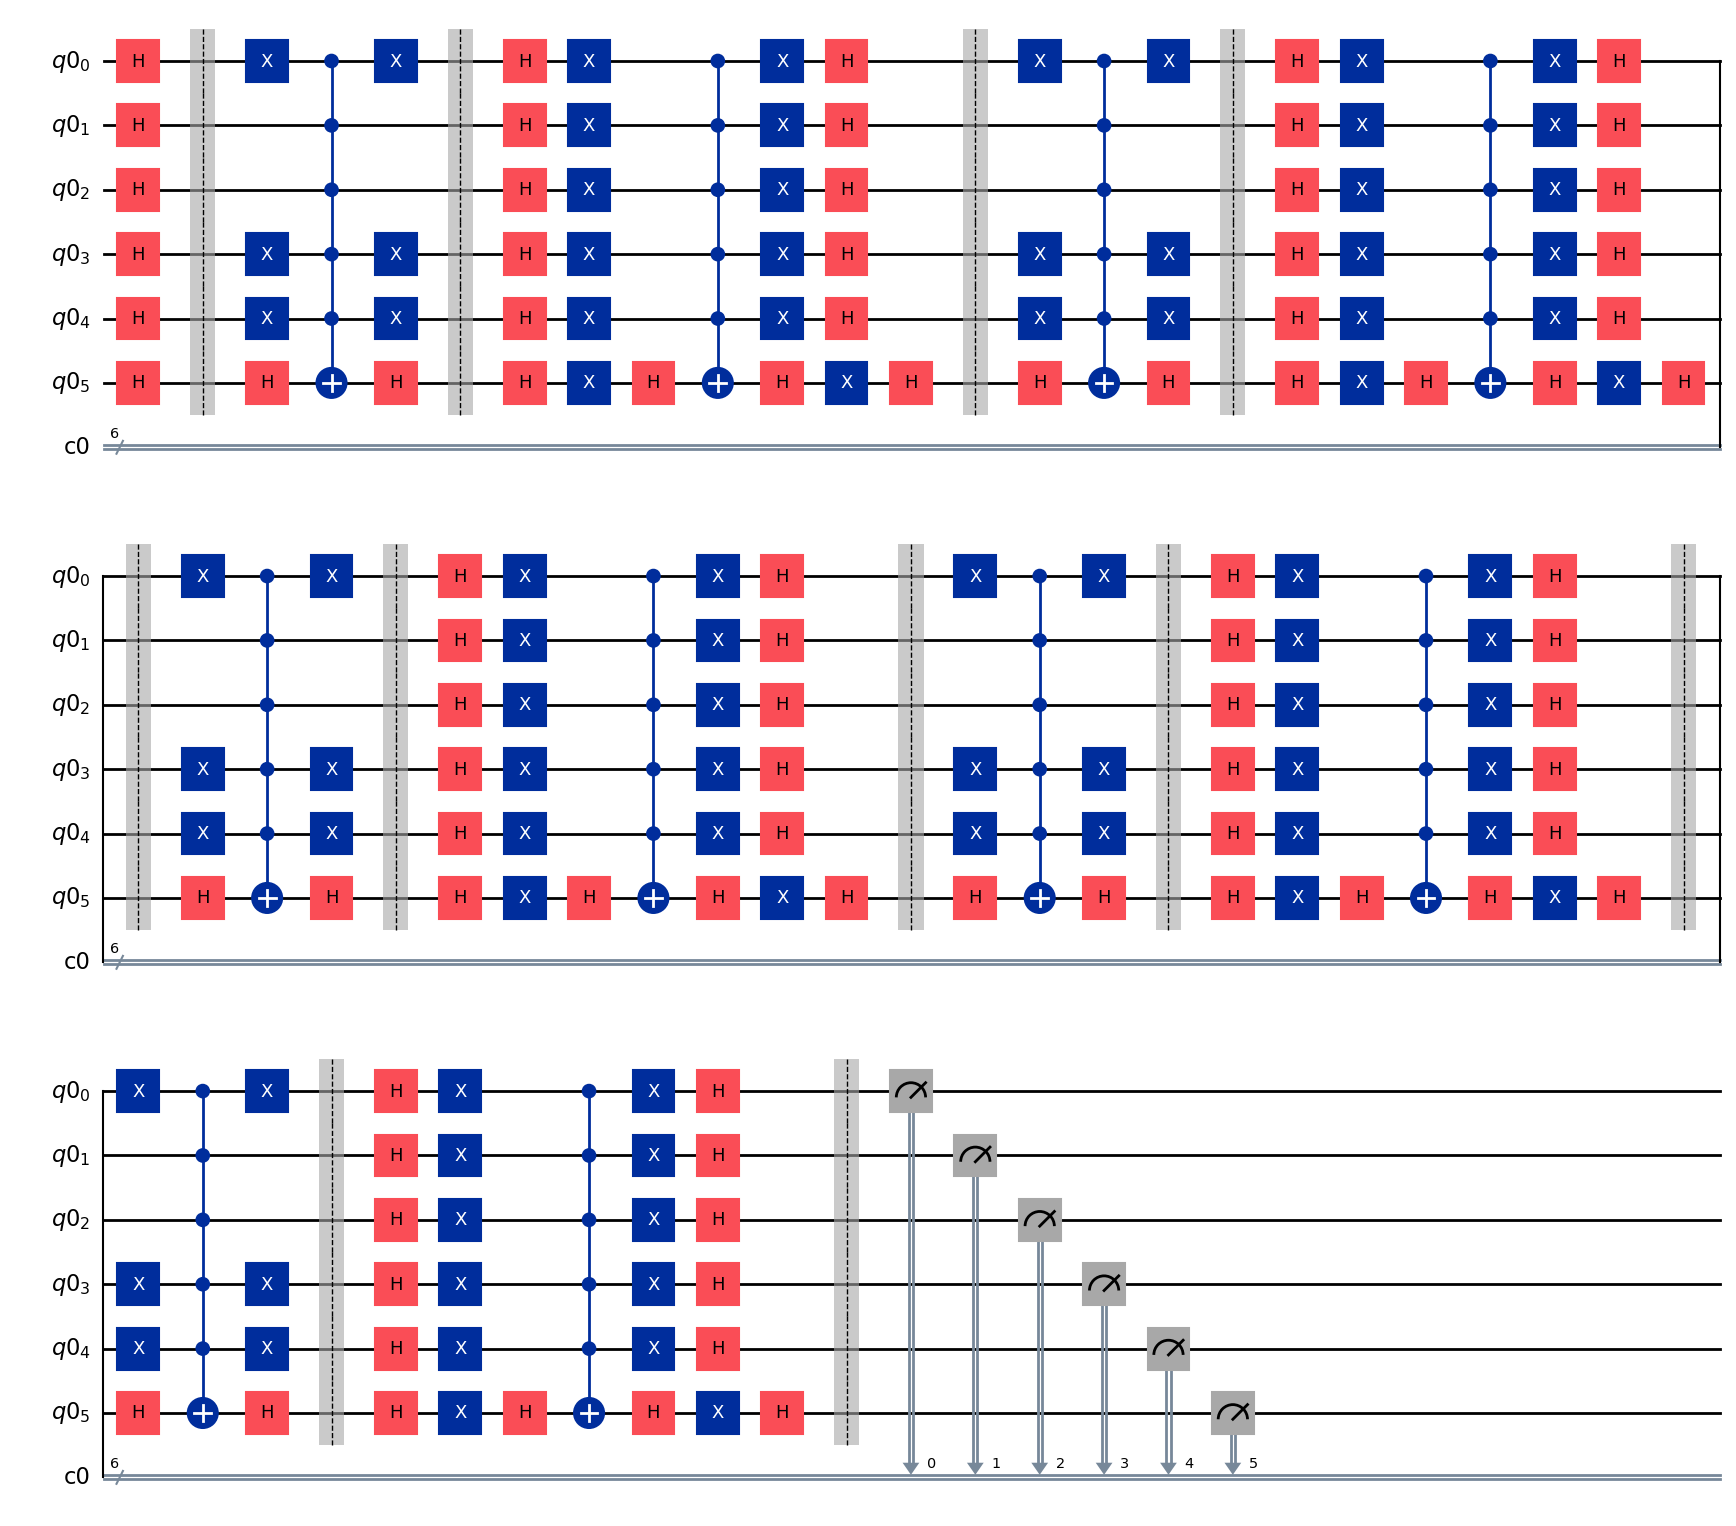

In [1]:
from sources.Grover import init_grover, diffuser, oracle

marked_state = "100110"
marked_state = marked_state[::-1]
n = len(marked_state)
qubits = range(n)

qc = init_grover(marked_state)
for _ in range(int(2 ** n ** 0.5)): # Big_O(sqrt(N))
    oracle(qc, marked_state)
    diffuser(qc, marked_state)
qc.measure(qubits, qubits)

qc.draw(output='mpl')

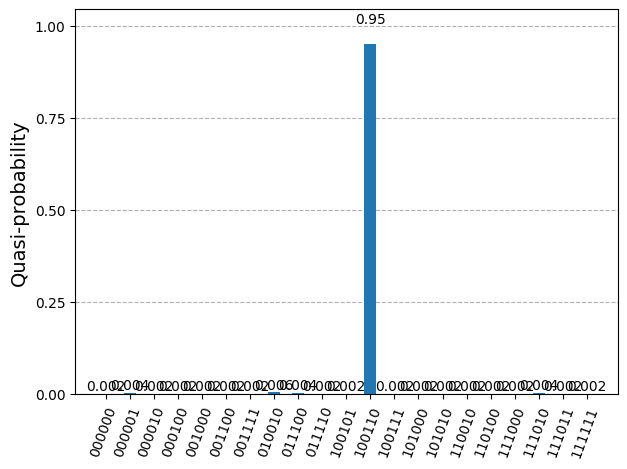

In [2]:
from sources.QSim import QSimulator
from qiskit.visualization import plot_distribution

counts = QSimulator(qc)
plot_distribution(counts)

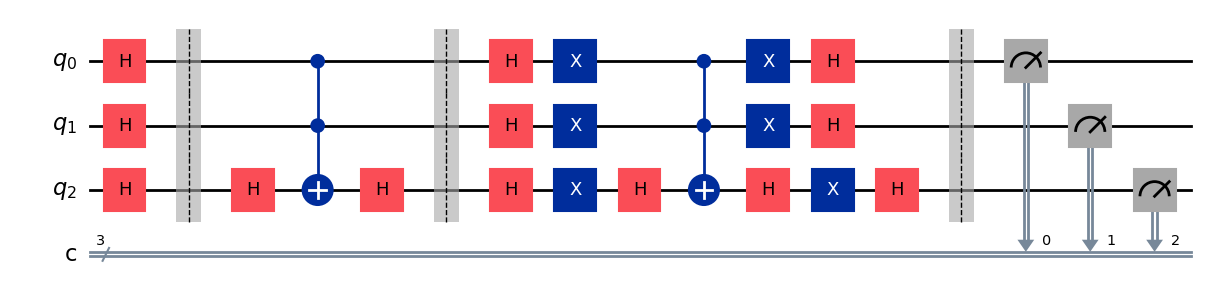

In [3]:
from qiskit import QuantumCircuit

def oracle_evo(qc):
    qc.h(2)
    qc.mcx([0, 1], 2)
    qc.h(2)
    qc.barrier()

def diffuser_evo(qc):
    qc.h([0, 1, 2])
    qc.x([0, 1, 2])
    qc.h(2)
    qc.mcx([0, 1], 2)
    qc.h(2)
    qc.x([0, 1, 2])
    qc.h([0, 1, 2])
    qc.barrier()

def init_grover_evo():
    qc = QuantumCircuit(3, 3)
    qc.h([0, 1, 2])
    qc.barrier()
    return qc

qc = init_grover_evo()
oracle_evo(qc)
diffuser_evo(qc)
qc.measure([0, 1, 2], [0, 1, 2])
qc.draw(output='mpl')

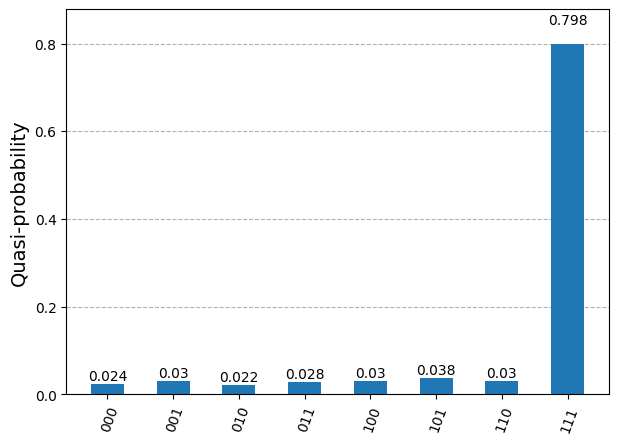

In [4]:
from sources.QSim import QSimulator
from qiskit.visualization import plot_distribution

counts = QSimulator(qc)
plot_distribution(counts)